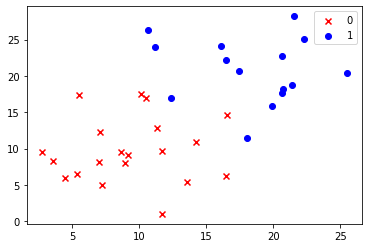

Score:  1.0


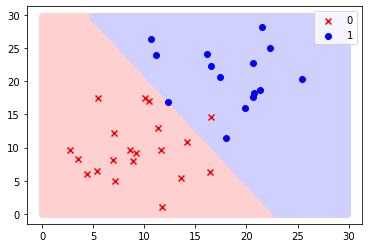

Score: 1.0


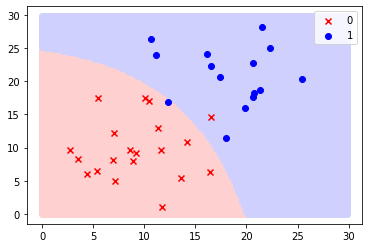

In [1]:
### データ読み込み
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('data_for_logistic.csv')
X = df[['x1', 'x2']]
y = df['t']

## 図示
data0 = X[y==0]
data1 = X[y==1]

plt.scatter(data0.x1, data0.x2, c='r', marker='x', label='0')
plt.scatter(data1.x1, data1.x2, c='b', marker='o', label='1')
plt.legend()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM
svm = SVC(kernel='linear')
# 学習
svm.fit(X_train, y_train)
# 評価
print('Score: ', svm.score(X_test, y_test))

import numpy as np
# 平面を色分け
def view_boundary(model):
    data = np.array([[x1, y1] for x1 in np.arange(0, 30, 0.2) for y1 in np.arange(0, 30, 0.2)])
    predict = model.predict(data)
    data0 = data[predict == 0]
    data1 = data[predict == 1]
    plt.scatter(data0[:,0], data0[:,1], c='#ffd0d0')
    plt.scatter(data1[:,0], data1[:,1], c='#d0d0ff')

view_boundary(svm)
plt.scatter(data0.x1, data0.x2, c='r', marker='x', label='0')
plt.scatter(data1.x1, data1.x2, c='b', marker='o', label='1')

plt.legend()
plt.show()

# 非線形の境界線
# kernel : 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svm2 = SVC(kernel='poly')
# 学習
svm2.fit(X_train, y_train)
# 評価
print('Score:', svm2.score(X_test, y_test))

view_boundary(svm2)
plt.scatter(data0.x1, data0.x2, c='r', marker='x', label='0')
plt.scatter(data1.x1, data1.x2, c='b', marker='o', label='1')
plt.legend()
plt.show()